In [3]:
import numpy as np
import pandas as pd
import seaborn as sb 
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore')

# x. Exploração Inicial dos dados -> manter esse padrão no resto do codigo
Realizamos uma análise inicial para as informações contida no csv buscando entender os tipos de informações armazenadas. Para isso, utilizamos funções da biblioteca Pandas.

In [4]:
data_base = pd.read_csv('Startups_in_2021_end.csv')
data_base.shape

(936, 8)

com a biblioteca `pandas` atribuimos o arquivo csv a variavel `data_base`
com o `.shape` sabemos que essa tabela tem 936 linhas e 8 colunas 


In [5]:
data_base.head()

,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


`.head` nos traz os primeiros valores dentro da tabela, com isso observamos brevemente o que é cada campo e os tipos de informações presentes
obs: também é possivel notar que um titulo de campo não apresenta nome

In [6]:
data_base.columns

Index(['Unnamed: 0', 'Company', 'Valuation ($B)', 'Date Joined', 'Country',
       'City', 'Industry', 'Select Investors'],
      dtype='object')

In [7]:
data_base.rename( columns={
    'Unnamed: 0' : 'ID',
    'Company' : 'EMPRESA',
    'Valuation ($B)' : 'VALOR ($B)',
    'Date Joined' : 'DATA ADESÃO',
    'Country' : 'PAIS',
    'City' : 'CIDADE',
    'Industry' : 'SERVIÇO',
    'Select Investors' : 'INVESTIDORES'
}, inplace=True)

retornamos exatamente quais os titulos de cada coluna para facilitar a renomeação dentro do dicionario, com a função `inplace=True` essa modificação se aplicará diretamente ao arquivo original.

In [8]:
data_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            936 non-null    int64 
 1   EMPRESA       936 non-null    object
 2   VALOR ($B)    936 non-null    object
 3   DATA ADESÃO   936 non-null    object
 4   PAIS          936 non-null    object
 5   CIDADE        921 non-null    object
 6   SERVIÇO       936 non-null    object
 7   INVESTIDORES  935 non-null    object
dtypes: int64(1), object(7)
memory usage: 58.6+ KB


e muito importante sempre verificarmos os tipos de informações presentes na tabela e também se as colunas apresentam valores nulos para evitar erros na manipulação dos dados

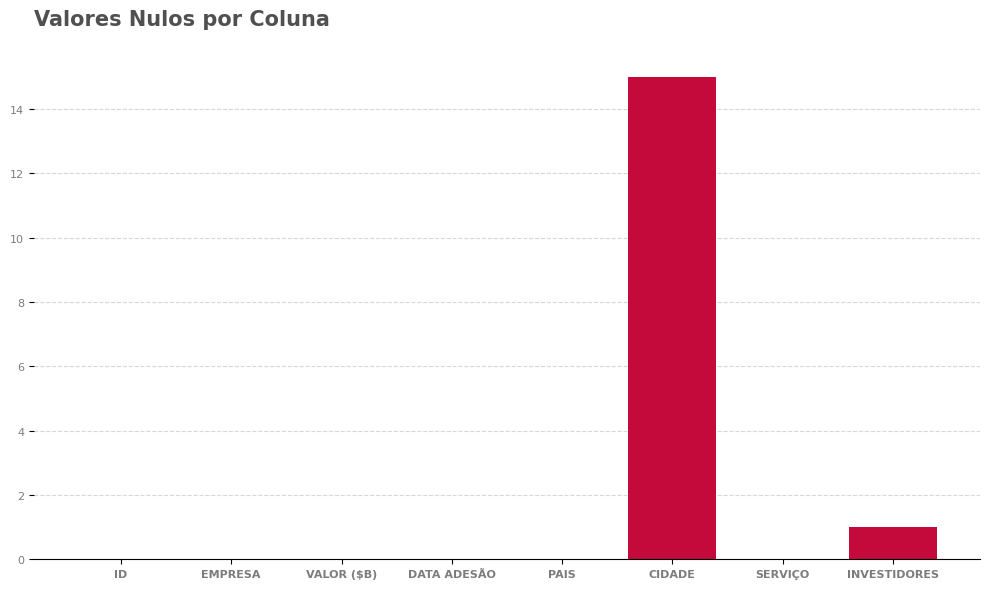

In [9]:
nulos = data_base.isnull().sum()

# tamanho do grafico
plt.figure(
    figsize = (10,6)
    )
# titulo
plt.title(
    'Valores Nulos por Coluna', 
    fontsize = 15, 
    fontweight = 'bold',
    color = "#505050",
    loc= 'left',
    pad= 20
    )
# rotulos de eixo
plt.yticks(
    color = '#7C7C7C', 
    fontsize = 8
    )
plt.xticks(
    color = '#7C7C7C', 
    fontsize = 8, 
    fontweight = 'bold'
    )
# grid
plt.grid(
    axis='y', 
    linestyle = '--', 
    alpha = 0.5, 
    zorder = 0
    )
# barras
plt.bar(
    nulos.index, 
    nulos.values, 
    color = "#C40A3B", 
    zorder = 2
    ); # ";" retira a mensagem de retorno
# bordas
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()



os valores nulos foram atribuidos a uma variavel para serem usados no grafico
o grafico de barras (produzido com a biblioteca matplotlib) acima representa a quantidade de valores `null` em relação a cada coluna da tabela, com isso é possivel analisar o possivel impacto da falta desses valores nas nossas analises posteriores, mas nem sempre os gráficos representam a importancia de um valor corretamente se não for utilizado da maneira certa   

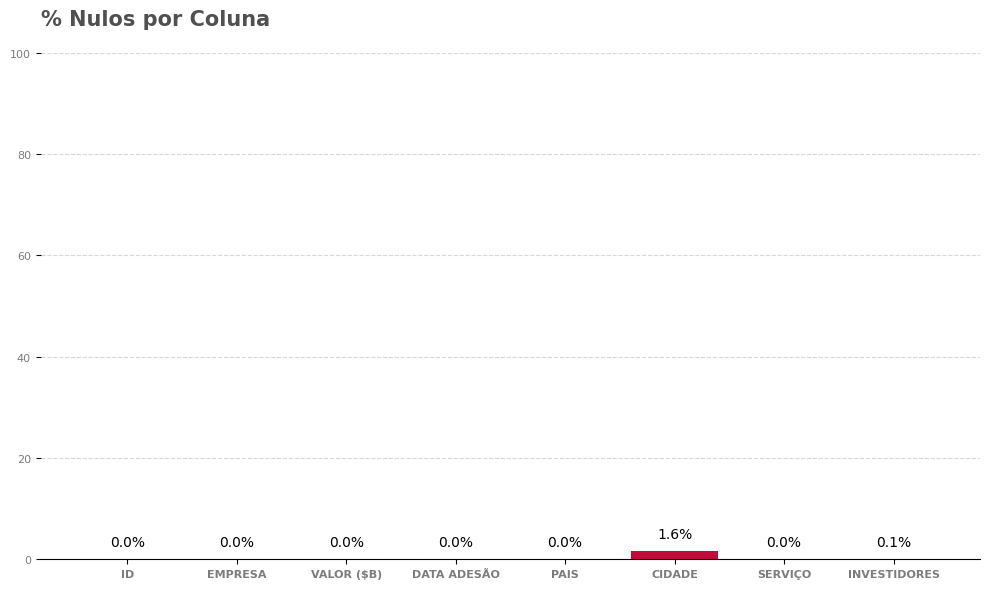

In [22]:
total_linhas = len(data_base)

percentual = (nulos / total_linhas) * 100


# tamanho do grafico
plt.figure(
    figsize = (10,6)
    )
# titulo
plt.title(
    '% Nulos por Coluna', 
    fontsize = 15, 
    fontweight = 'bold',
    color = "#505050",
    loc= 'left',
    pad= 20
    )
# eixos
plt.ylim(0, 100)
plt.yticks(
    color = '#7C7C7C', 
    fontsize = 8
    )
plt.xticks(
    color = '#7C7C7C', 
    fontsize = 8, 
    fontweight = 'bold'
    )
# grid
plt.grid(
    axis='y', 
    linestyle = '--', 
    alpha = 0.5, 
    zorder = 0
    )
# barras
plt.bar(
    percentual.index, 
    percentual.values, 
    color = "#C40A3B", 
    zorder = 2
    ); # ";" retira a mensagem de retorno
# valores das colunas 
for p, v in enumerate(percentual.values):
    plt.text(
            p,
            v + 2,  
            f"{v:.1f}%", 
            ha="center", 
            va="bottom", 
            fontsize=10)

# bordas
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()



agora, transformando os valores nulos em porcentagem do total de linhas é possivel ter a real noção do impacto que a falta de informações pode ter para cada coluna

In [11]:
# valores unicos 

data_base.nunique()

ID              936
EMPRESA         935
VALOR ($B)      192
DATA ADESÃO     589
PAIS             47
CIDADE          239
SERVIÇO          17
INVESTIDORES    920
dtype: int64

In [12]:
# lista dos valores unicos da coluna SERVIÇO

data_base['SERVIÇO'].unique()

array(['Artificial intelligence', 'Other', 'Fintech',
       'Internet software & services',
       'Supply chain, logistics, & delivery',
       'Data management & analytics', 'Edtech',
       'E-commerce & direct-to-consumer', 'Hardware', 'Health',
       'Consumer & retail', 'Auto & transportation', 'Finttech',
       'Cybersecurity', 'Mobile & telecommunications', 'Travel',
       'Artificial Intelligence'], dtype=object)

In [13]:
# quantidade de repetições de cada valor 
data_base['SERVIÇO'].value_counts()

SERVIÇO
Fintech                                190
Internet software & services           167
E-commerce & direct-to-consumer        102
Artificial intelligence                 69
Health                                  63
Supply chain, logistics, & delivery     51
Other                                   51
Cybersecurity                           41
Mobile & telecommunications             37
Data management & analytics             36
Hardware                                32
Auto & transportation                   29
Edtech                                  27
Consumer & retail                       23
Travel                                  13
Artificial Intelligence                  4
Finttech                                 1
Name: count, dtype: int64

In [14]:
# quantidade percentual de repetições de cada valor 
data_base['SERVIÇO'].value_counts(normalize=True) # normalize=True transforma a quantidade de valores em percentual

SERVIÇO
Fintech                                0.202991
Internet software & services           0.178419
E-commerce & direct-to-consumer        0.108974
Artificial intelligence                0.073718
Health                                 0.067308
Supply chain, logistics, & delivery    0.054487
Other                                  0.054487
Cybersecurity                          0.043803
Mobile & telecommunications            0.039530
Data management & analytics            0.038462
Hardware                               0.034188
Auto & transportation                  0.030983
Edtech                                 0.028846
Consumer & retail                      0.024573
Travel                                 0.013889
Artificial Intelligence                0.004274
Finttech                               0.001068
Name: proportion, dtype: float64

após esses 3 analises rapidas do bd podemos perceber o valor "finttech" que é uma digitação errada do valor "fintech", que devemos alterar para não causar problemas na nossa analise grafica

In [15]:
data_base.SERVIÇO.replace({
    'Finttech': 'Fintech'
    }, inplace=True
)
  

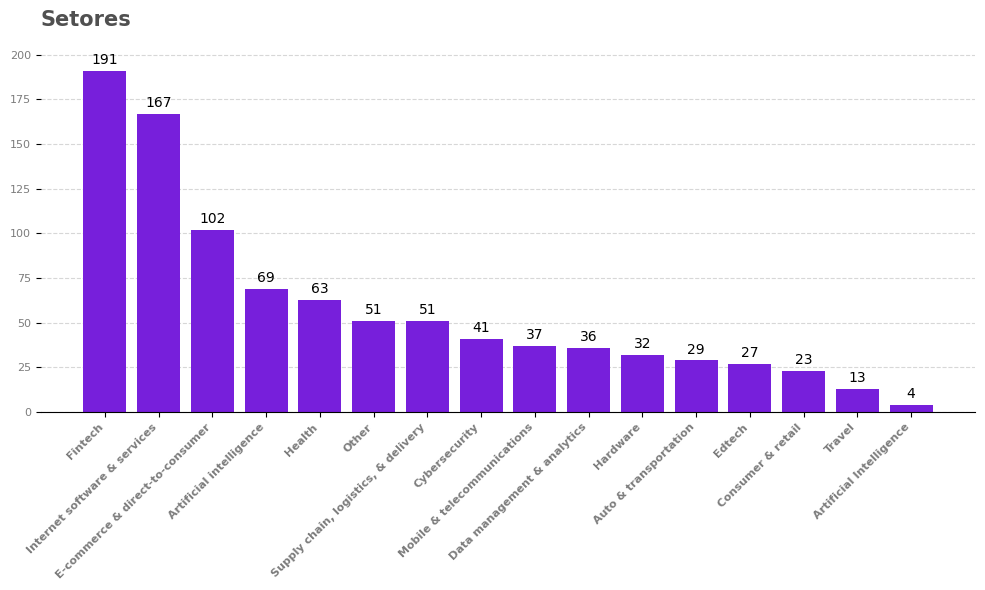

In [20]:
# tamanho do grafico
plt.figure(
    figsize = (10,6)
    )
# titulo
plt.title(
    'Setores', 
    fontsize = 15, 
    fontweight = 'bold',
    color = "#505050",
    loc= 'left',
    pad= 20
    )
# eixos
plt.yticks(
    color = '#7C7C7C', 
    fontsize = 8
    )
plt.xticks(
    rotation=45,
    ha='right',
    color = '#7C7C7C', 
    fontsize = 8, 
    fontweight = 'bold'
    )
# grid
plt.grid(
    axis='y', 
    linestyle = '--', 
    alpha = 0.5, 
    zorder = 0
    )
# barras
plt.bar(
    data_base['SERVIÇO'].value_counts().index,
    data_base['SERVIÇO'].value_counts().values,
    color = "#771FDB", 
    zorder = 2
    ); # ";" retira a mensagem de retorno
# valores das colunas 
for p, v in enumerate(data_base['SERVIÇO'].value_counts()):
    plt.text(p, v + 2,
              str(v), 
              ha="center", 
              va="bottom", 
              fontsize=10)

# bordas
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()



In [24]:
porcentagem_pais = round(data_base['PAIS'].value_counts(normalize=True) * 100, 1)

In [27]:
porcentagem_pais

PAIS
United States           51.0
China                   18.1
India                    5.4
United Kingdom           4.0
Germany                  2.5
Israel                   2.2
France                   2.0
Brazil                   1.6
Canada                   1.6
South Korea              1.2
Singapore                1.2
Hong Kong                0.7
Japan                    0.6
Australia                0.6
Netherlands              0.5
Mexico                   0.5
Switzerland              0.4
Sweden                   0.4
Indonesia                0.4
Spain                    0.4
Norway                   0.3
Ireland                  0.3
United Arab Emirates     0.3
Turkey                   0.2
Colombia                 0.2
Belgium                  0.2
Austria                  0.2
Finland                  0.2
Denmark                  0.2
Philippines              0.2
Thailand                 0.2
South Africa             0.2
Luxembourg               0.1
Vietnam                  0.1
Estonia  